**LIMPIEZA DE DATOS CON PYTHON Y PANDAS**

**1. El problema del negocio**<br>
Como núcleo familiar, la familia Miranda, ha decidido crear un pequeño archivo de
presupuesto en el que administrará los principales gastos del hogar.  Existen otros tres archivos de gastos, uno por cada miembro de
la familia.

**2. El set de datos**<br>
La información recolectada es un presupuesto familiar se encuentra en un archivo EXCEL (gastos.xlsx) con 56 filas y 5 columnas.

Cada registro contiene 5 característica. Las columnas son:

-"fecha"<br>
-"flujo casa mes"<br>
-"valor"<br>
-"Forma de Pago"<br>
-"idCategoria"<br>

**3. Una primera mirada al dataset**

In [13]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Pandas setup
pd.options.display.max_columns
pd.set_option('display.max_columns', None)

In [27]:
current_path=os.getcwd()
parent_directory = os.path.split(current_path)[0]
folder_path=os.path.join(parent_directory, "bronze_stage")

df = pd.read_excel(os.path.join(folder_path,"gastos.xlsx"))


d:\info\Trabajo\unal\sesion_11\Components


In [19]:
print(df.shape)
df.head()

(56, 5)


,fecha,flujo casa mes,valor,Forma de Pago,idCategoria
0,2023-09-01,contrato hijo,2500000.0,efectivo,COMIDAS AFUERA
1,2023-09-01,helados casa,3000.0,efectivo,COMIDAS AFUERA
2,2023-09-01,cafe americano,5000.0,efectivo,COMIDAS AFUERA
3,2023-09-02,cafe,5000.0,efectivo,COMIDAS AFUERA
4,2023-09-02,Cafe Tostado,9100.0,efectivo,COMIDAS AFUERA


In [20]:
# Veamos las variables categóricas y las numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           56 non-null     datetime64[ns]
 1   flujo casa mes  56 non-null     object        
 2   valor           55 non-null     float64       
 3   Forma de Pago   56 non-null     object        
 4   idCategoria     56 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.3+ KB


**4. Limpieza**<br>
Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas


**4.1 Datos faltantes**<br>
Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.<br>
El número total de registros debería ser 56. Sin embargo columnas como "valor", "idCategoria"<br>
Por ser tan pocos los datos faltantes optaremos por eliminar las filas correspondientes:

In [21]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 55
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           55 non-null     datetime64[ns]
 1   flujo casa mes  55 non-null     object        
 2   valor           55 non-null     float64       
 3   Forma de Pago   55 non-null     object        
 4   idCategoria     55 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.6+ KB


**4.2 Columnas irrelevantes**<br>
Una columna irrelevante puede ser:

Una columna que no contiene información relevante para el problema que queremos resolver. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)<br>
- Una columna categórica pero con un sólo nivel. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".<br>
- Una columna numérica pero con un sólo valor. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.<br>
- Columnas con información redundante. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.<br>

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [22]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['fecha', 'flujo casa mes', 'valor', 'Forma de Pago', 'idCategoria']

for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna fecha: 23 subniveles
Columna flujo casa mes: 53 subniveles
Columna valor: 43 subniveles
Columna Forma de Pago: 1 subniveles
Columna idCategoria: 10 subniveles


Verifiquemos lo que ocurre con las columnas numéricas:

In [23]:
df.describe()

,valor
count,5.500000e+01
mean,1.031702e+05
std,3.527842e+05
min,1.500000e+03
25%,9.500000e+03
50%,2.000000e+04
75%,4.195000e+04
max,2.500000e+06


La columna numérica tiene desviacion estándar ("std") diferente de cero

**4.3 Filas repetidas**

In [27]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (55, 5)
Tamaño del set después de eliminar las filas repetidas: (55, 5)


**4.4 *Outliers* en las variables numéricas**

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.<br>
Creemos gráficas tipo "boxplot" de las columnas numéricas:

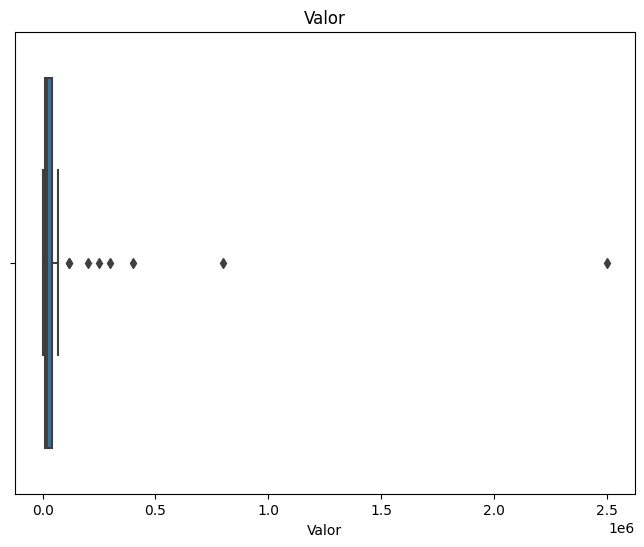

In [37]:
# Crear el boxplot
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la gráfica
sns.boxplot(x="valor", data=df)

# Agregar un título y etiquetas a los ejes
plt.title("Valor")
plt.xlabel("Valor")
plt.ylabel("")

# Mostrar la gráfica
plt.show()

**4.5 Errores tipográficos en variables categóricas**

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.Se deben unificar estos sub-niveles. Eliminar espacios o parentesis del nombre de las columnas

In [54]:
nuevos_nombres_de_columnas = ['fecha', 'flujo_casa_mes', 'valor', 'forma_de_pago', 'nombre_categoria']
df.columns = nuevos_nombres_de_columnas

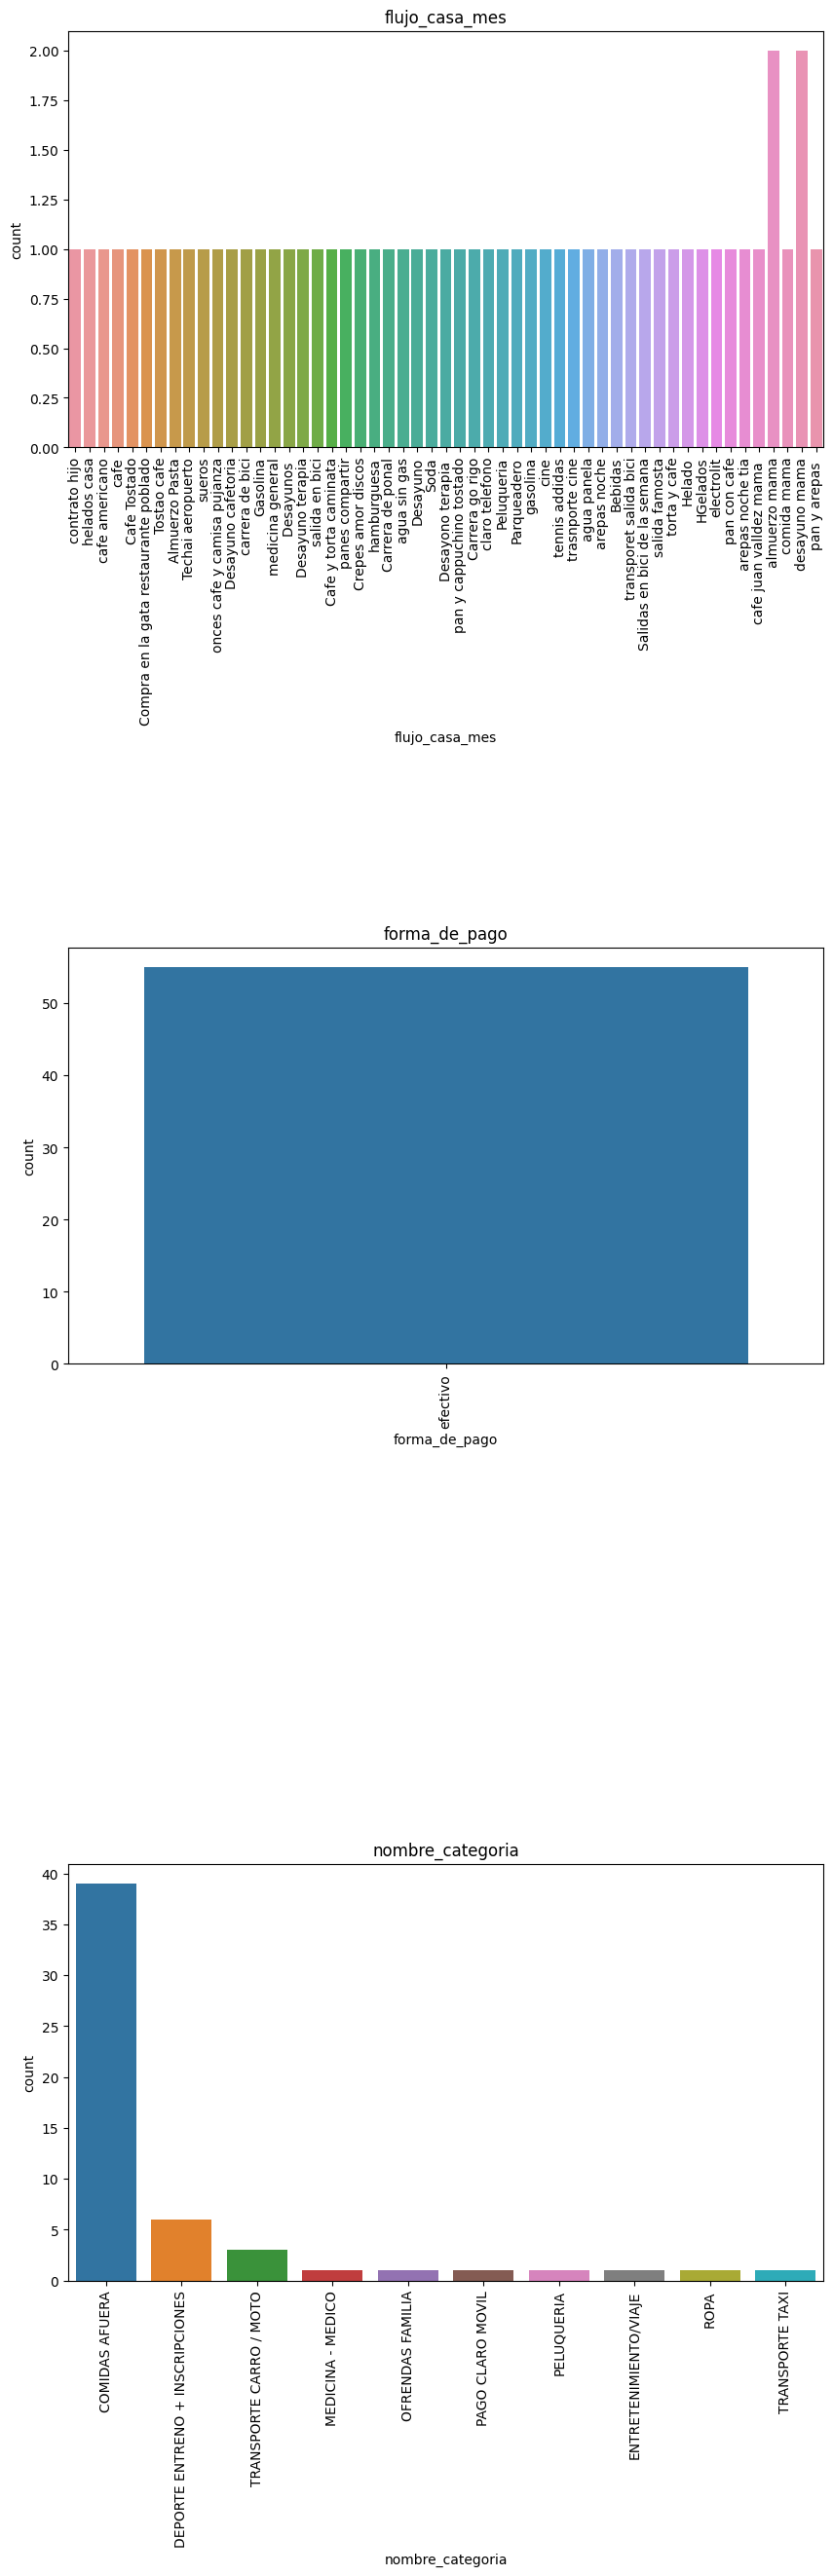

In [59]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['flujo_casa_mes', 'forma_de_pago', 'nombre_categoria']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1.2)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

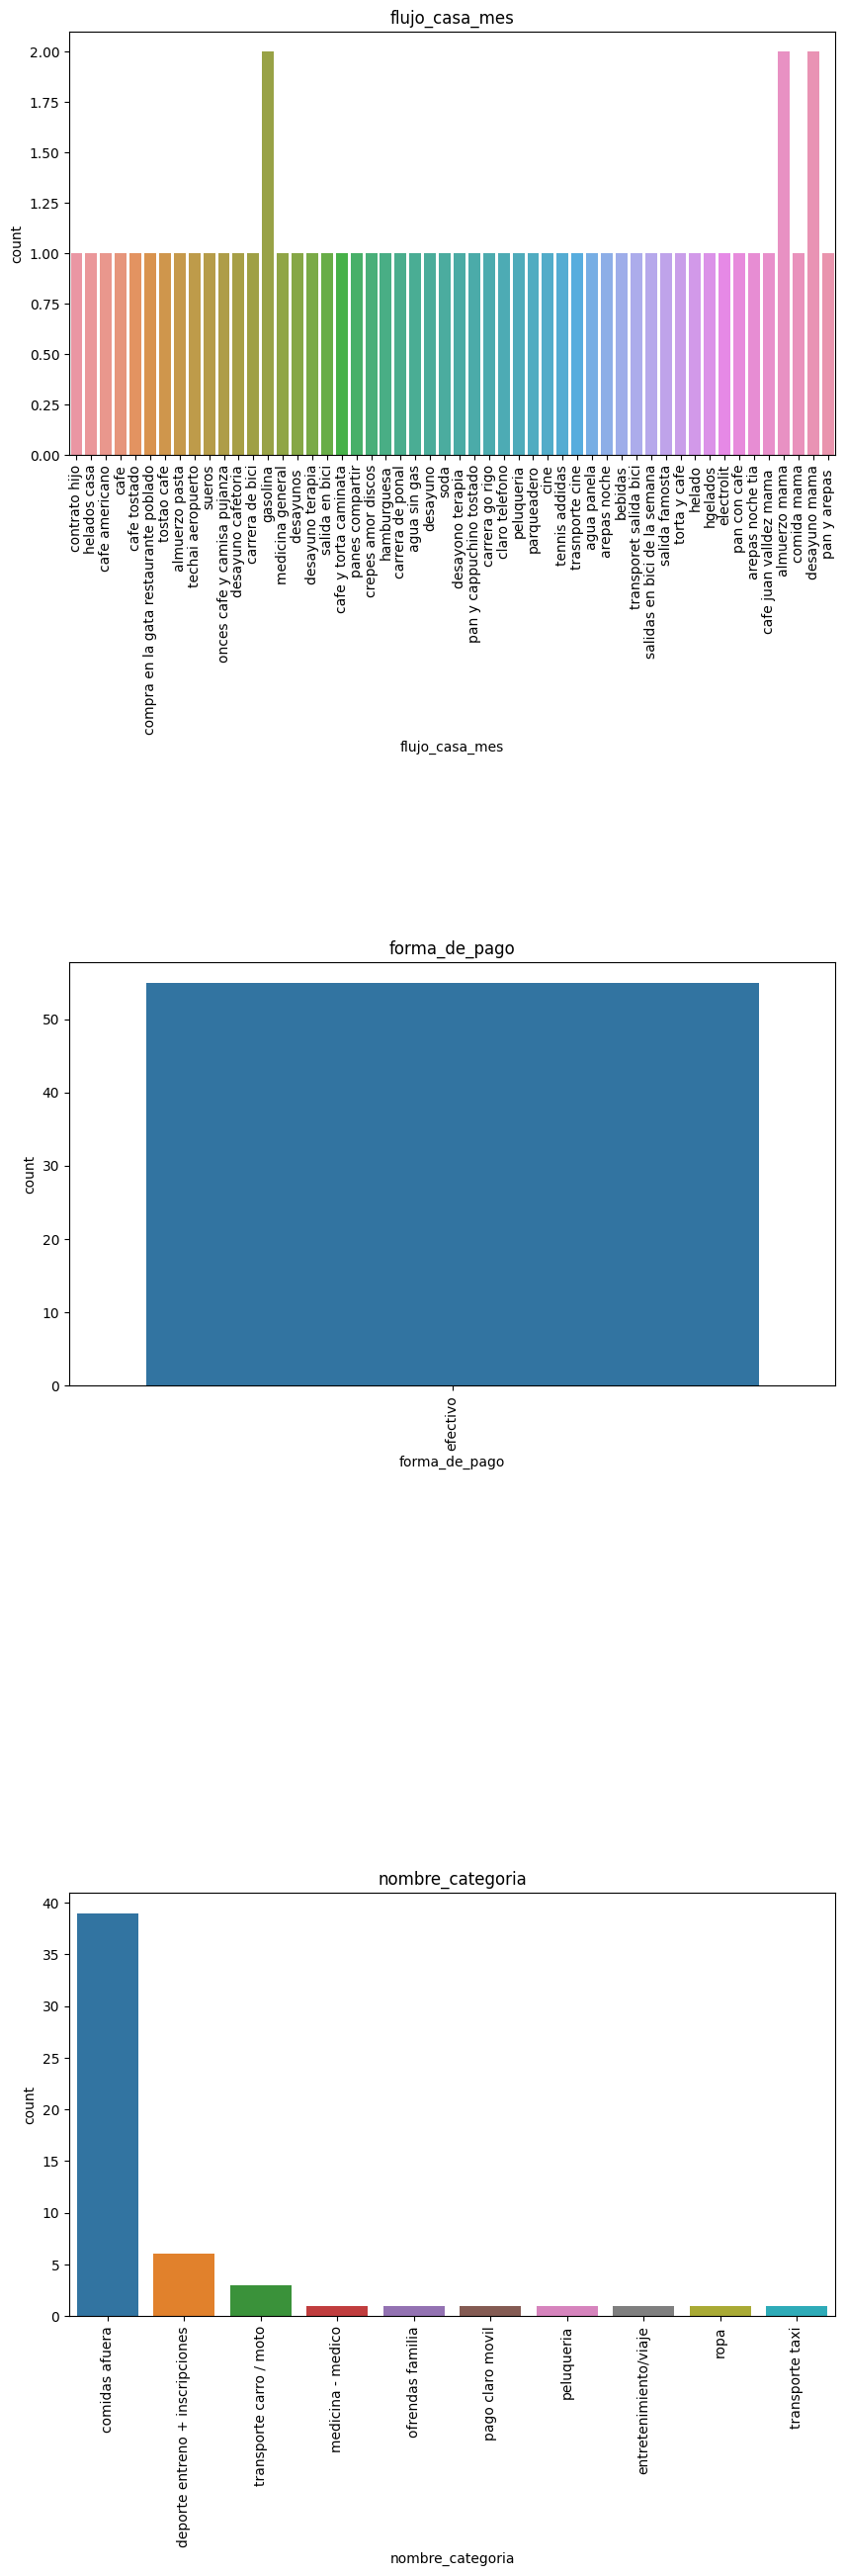

In [61]:
for column in df.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        df[column] = df[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1.2)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

In [62]:
componentes_unicos_nombre_banco = df['flujo_casa_mes'].unique()
componentes = len(componentes_unicos_nombre_banco)
print(componentes_unicos_nombre_banco)
print("El número de componentes en el array es:", componentes)

['contrato hijo' 'helados casa' 'cafe americano' 'cafe' 'cafe tostado'
 'compra en la gata restaurante poblado' 'tostao cafe' 'almuerzo pasta'
 'techai aeropuerto' 'sueros' 'onces cafe y camisa pujanza'
 'desayuno cafetoria' 'carrera de bici' 'gasolina' 'medicina general'
 'desayunos ' 'desayuno terapia' 'salida en bici' 'cafe y torta caminata'
 'panes compartir' 'crepes amor discos' 'hamburguesa' 'carrera de ponal'
 'agua sin gas' 'desayuno' 'soda' 'desayono terapia '
 'pan y cappuchino tostado' 'carrera go rigo' 'claro telefono'
 'peluqueria' 'parqueadero' 'cine' 'tennis addidas' 'trasnporte cine'
 'agua panela' 'arepas noche' 'bebidas' 'transporet salida bici'
 'salidas en bici de la semana' 'salida famosta' 'torta y cafe' 'helado'
 'hgelados' 'electrolit' 'pan con cafe' 'arepas noche tia'
 'cafe juan valldez mama ' 'almuerzo mama' 'comida mama' 'desayuno mama'
 'pan y arepas ']
El número de componentes en el array es: 52


In [63]:
df['flujo_casa_mes'] = df['flujo_casa_mes'].str.replace('cafe americano','cafe', regex=False)
df['flujo_casa_mes'] = df['flujo_casa_mes'].str.replace('cafe tostado','cafe', regex=False)
df['flujo_casa_mes'] = df['flujo_casa_mes'].str.replace('tostao cafe','cafe', regex=False)

In [64]:
componentes_unicos_nombre_banco = df['flujo_casa_mes'].unique()
componentes = len(componentes_unicos_nombre_banco)
print(componentes_unicos_nombre_banco)
print("El número de componentes en el array es:", componentes)

['contrato hijo' 'helados casa' 'cafe'
 'compra en la gata restaurante poblado' 'almuerzo pasta'
 'techai aeropuerto' 'sueros' 'onces cafe y camisa pujanza'
 'desayuno cafetoria' 'carrera de bici' 'gasolina' 'medicina general'
 'desayunos ' 'desayuno terapia' 'salida en bici' 'cafe y torta caminata'
 'panes compartir' 'crepes amor discos' 'hamburguesa' 'carrera de ponal'
 'agua sin gas' 'desayuno' 'soda' 'desayono terapia '
 'pan y cappuchino tostado' 'carrera go rigo' 'claro telefono'
 'peluqueria' 'parqueadero' 'cine' 'tennis addidas' 'trasnporte cine'
 'agua panela' 'arepas noche' 'bebidas' 'transporet salida bici'
 'salidas en bici de la semana' 'salida famosta' 'torta y cafe' 'helado'
 'hgelados' 'electrolit' 'pan con cafe' 'arepas noche tia'
 'cafe juan valldez mama ' 'almuerzo mama' 'comida mama' 'desayuno mama'
 'pan y arepas ']
El número de componentes en el array es: 49


In [65]:
df.shape

(55, 5)

In [67]:
ruta = "silver_stage\gastos_clean.xlsx"
df.to_excel(ruta, index=False)

**Gerenación de datos**

In [71]:
df['iva']=df['valor']*0.19
df.head(10)

,fecha,flujo_casa_mes,valor,forma_de_pago,nombre_categoria,iva
0,2023-09-01,contrato hijo,2500000.0,efectivo,comidas afuera,475000.0
1,2023-09-01,helados casa,3000.0,efectivo,comidas afuera,570.0
2,2023-09-01,cafe,5000.0,efectivo,comidas afuera,950.0
3,2023-09-02,cafe,5000.0,efectivo,comidas afuera,950.0
4,2023-09-02,cafe,9100.0,efectivo,comidas afuera,1729.0
5,2023-09-02,compra en la gata restaurante poblado,70000.0,efectivo,comidas afuera,13300.0
6,2023-09-02,cafe,12300.0,efectivo,comidas afuera,2337.0
7,2023-09-02,almuerzo pasta,114800.0,efectivo,comidas afuera,21812.0
8,2023-09-03,techai aeropuerto,68800.0,efectivo,comidas afuera,13072.0
9,2023-09-03,sueros,20620.0,efectivo,comidas afuera,3917.8


In [72]:
ruta = "golden_stage\gastos_info.xlsx"
df.to_excel(ruta, index=False)